<a href="https://colab.research.google.com/github/OasisLead/Hello-world/blob/main/MACS207bOFDMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MACS207b : Outage probability in OFDMA protocol

### Q1)


Pour montrer que le processus des clients actifs est un processus de Poisson, nous devons vérifier deux propriétés : l'indépendance et la stationnarité.

L'indépendance : Nous supposons que les arrivées des utilisateurs sont des événements indépendants. La présence ou l'absence d'un utilisateur n'affecte pas l'arrivée d'un autre utilisateur. Par conséquent, nous pouvons considérer que les arrivées des clients actifs sont indépendantes.

Stationnarité : Nous supposons que le processus des clients actifs a un taux d'arrivée constant dans le temps. Cela signifie que la mesure de l'intensité du processus reste constante dans la fenêtre d'observation.

Considérons une région circulaire de rayon R centrée sur le point d'accès $(0, 0)$. Nous voulons trouver la mesure d'intensité du processus des clients actifs dans cette région circulaire.
La mesure d'intensité dans un sous-ensemble A de la fenêtre d'observation est donnée par $\lambda \mathcal{A}$, où $\mathcal{A}$ représente la surface du sous-ensemble $A$.
Dans ce cas, le sous-ensemble $A$ est la région circulaire de rayon $R$. La surface d'un cercle est donnée par $\mathcal{A} = \pi R^2$. Par conséquent, la mesure de l'intensité du processus des clients actifs dans la région circulaire de rayon $R$ est la suivante : $\mu = \lambda \pi R^2$

### Q2)

Pour trouver le nombre moyen de clients actifs dans la cellule, nous pouvons utiliser les propriétés du processus de Poisson et le pourcentage d'utilisateurs actifs $p$.

Dans un processus de Poisson, le nombre moyen d'événements (dans ce cas, les clients actifs) dans un intervalle de temps donné est égal au produit de la mesure d'intensité $\mu$ et de la durée de l'intervalle de temps. La durée de l'intervalle de temps est notée $T$. Le nombre moyen de clients actifs peut être calculé comme suit :
$\mathbb{E}[N_{active}] = \mu  T p$ en prennant en compte le pourcentage d'utilisateurs actifs $p$, qui représente la probabilité qu'un utilisateur soit actif dans un créneau horaire donné.
Par conséquent, le nombre moyen de clients actifs dans la cellule est le suivant :

En utilisant le résultat de la question précédente, nous obtenons :

$\mathbb{E}[N_{active}] = \lambda \pi R^2  T  p$

Ainsi, le nombre moyen de clients actifs dans la cellule est $\lambda \pi R^2  T  p$.

### Q3)

On utilise la formule de $N(x)$ qui est croissant et bijectif pour retrouver les expressions des rayons $R_{k,min}$ et $R_{k,max}$ sachant que $k\lt N(x)\leq k+1$. On obtient :

$$
\begin{array}{c}
R_{k, \min }=\left\{\begin{array}{ll}
0 & k=1 \\
R_{k-1, \max } & k \geq 2
\end{array}\right. \\
R_{k, \max }=\min \left(\left(\frac{K}{2^{\frac{C}{k W}}-1}\right)^{1 / \gamma}, R\right)
\end{array}
$$

Le sous en semble of the cell in which all customers require k subcarriers is the ring bewteen $R_{k,min}$ et $R_{k,max}$.

### Q4)

$$A_3 = \sum \mathbb{1}_{x \text{ in zone 3}}$$

D'après le Théorème 5.3 du cours, la distribution de $A_3$ est une loi de Poisson de paramètre $\mu_{\text{zone 3}} = \eta_3$. Or :

$$
\begin{aligned}
\eta_k & =\int_0^{2 \pi} \int_{R_{k, \min }}^{R_{k, \max }} p \lambda r d r d \theta \\
& =p \lambda \pi\left(R_{k, \max }^2-R_{k, \min }^2\right)
\end{aligned}
$$

Donc $$\eta_3 = p \lambda \pi\left(R_{3, \max }^2-R_{3, \min }^2\right) = p \lambda \pi\left(R_{3, \max }^2-R_{2, \max }^2\right) = p \lambda \pi\left((245.56)^2-(208.85)^2\right) = 5.24$$

### Q5)

Pour determiner si les A3 a une distribution en loi de poisson, on peut simuler notre spatial poisson process des active users dans le cercle, afin de compter le nombre de x dans la zone des N(x)=3 , puis comparer la fonction de répartition
empirique du nombre x dans la zone N(x) = 3 avec la fonction de répartition théorique de A(3) par le test KS, qui va mesurer la similarité entre
les deux fonction de répartition.

Pour simuler notre processus, il suffit de tirer une loi de poisson de paramètre mu(E), et de prendre les points uniformément dans le cercle.
Ensuite, on garde uniquement les x tel que N(x) = 3, on les dénombre et on met cette quantité dans un vecteur. On repète ce procédé n fois de manière
indépendante afin d'avoir un échantillon qui représente assez bien la loi.
Ensuite on peut simplement opérer notre test.

In [ ]:
import numpy as np;
import math
from scipy.stats import kstest, poisson

#Simulation parameters
R=300
areaTotal=np.pi*R**2
lambda0 = 0.01
p = 0.01
W = 250
C=200
K=10**6
gamma=2.8
a = p*lambda0*np.pi*( ( K/2**(C/(3*W)) )**(1/gamma) - ( K/2**(C/(2*W)) )**(1/gamma) )


# Fonction qui renvoie N
def N(r) :
	return math.floor( C/( W*math.log2(1+K/r**(2*gamma)) ))


n = 1000
A3empirique = []
for i in range(n):
	#Simulate Poisson point process
	numbPoints = np.random.poisson(lambda0*areaTotal);#Poisson number of points
	theta=2*np.pi*np.random.uniform(0,1,numbPoints); #angular coordinates
	rho=R*np.sqrt(np.random.uniform(0,1,numbPoints)); #radial coordinates

	count = 0
	for r in rho:
		if N(r)==3:
			count+=1
	A3empirique+=[count]


def ks_test_poisson(A3empirique, a):
    # Generate the expected Poisson distribution based on the parameter 'a'
    expected_distribution = poisson(a)

    # Calculate the cumulative distribution function (CDF) of the expected distribution
    expected_cdf = expected_distribution.cdf(np.arange(np.max(A3empirique) + 1))

    # Perform the KS test on the sample data
    ks_statistic, p_value = kstest(A3empirique, expected_cdf)

    return ks_statistic, p_value

ks_statistic, p_value = ks_test_poisson(A3empirique, a)
print("P-value : ", p_value)

P-value :  0.12155364205954536


On observe une P-value relativement faible ce qui indique que les deux fonctions de répartitions sont proches.

### Q6)

On a :

$$
\begin{aligned}
F(\phi) & =\sum_{k=1}^{N_{\max }} F\left(A_k\right) \\
& =\sum_{k=1}^{N_{\max }} \sum_{x \in A_k} N(x) \\
& =\sum_{k=1}^{N_{\max }} k \zeta_k,
\end{aligned}
$$

où $\zeta_k$ est le nombre d'utilisateurs dans $A_k$ suivant la loi de poisson de paramètre $\eta_k$ dont l'expression a été trouvée précédemment.

### Q7)

On calcule :

$$E[e^{\theta X_\mu}] = \sum_{k=1}^{ + \infty } e^{\theta k}e^{- \mu} \frac{\mu ^k}{k!} = \text{exp}(\mu(e^\theta - 1))$$

$$\frac{d}{d \theta}(e^{-K \mu \theta} \mathbf{E}\left[e^{\theta X_\mu}\right]) = 0 \Leftrightarrow \theta = log(k)$$ donc $$
\min _{\theta>0} e^{-K \mu \theta} \mathbf{E}\left[e^{\theta X_\mu}\right]
 = exp(\mu(k - 1 - klog(k)))$$

### Q8)

Avec la question précédente, on déduit qu'on doit résoudre $\text{exp}(\mu (k - 1 - k\text{log}(k))) = 10^{-4}$, on décide de le faire numériquement.


In [ ]:
import math
from scipy.optimize import fsolve

def equation(K, mu):
    return math.exp(mu * (K - 1 - K * math.log(K))) - 10**(-4)

def calculate_K(mu):
    initial_guess = 10  # Valeur de départ pour la recherche de la solution
    result = fsolve(equation, initial_guess, args=(mu,))
    return result[0]  # Affiche la valeur de la solution

#### 9.1)

$$
N_{\max }=\left[\frac{C}{W \log _2\left(1+S N R_{\min }\right)}\right] = 19.32
$$

#### 9.2)

$$\forall k \text{ tel que } 1 \leq k \leq N_{max} \text{, } \mathbb{E}[\zeta_k] = \eta_k =p \lambda \pi\left(R_{k, \max }^2-R_{k, \min }^2\right) \text{que l'on a calculé précédemment.}$$

#### 9.3)




On calcule K pour chaque vecteur, ce qui va nous donner le nombre de valeurs nécéssaires pour simuler nos vecteurs sans perdre trop d'information.

In [ ]:
R=300
lambda0 = 0.01
p = 0.01
W = 250
C=200
K=10**6
gamma=2.8

import math

def R_k_max(k):
    return min(R, (K/(2**(C/(k*W)) - 1))**(1/gamma))

def R_k_min(k):
    if k == 1:
        return 0
    else:
        return R_k_max(k - 1)

def eta_k(k):
    return p*np.pi*lambda0*(R_k_max(k)**2 - R_k_min(k)**2)

eta = [eta_k(j) for j in range(1, 7)]

# On peut maitenant calculer K pour chaque valeur du paramètre de la loi de poisson
max_K = max([calculate_K(i) for i in eta])
print("Max K : ", max_K)




Max K :  19.129326734417152


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


#### 9.4) et 9.5)

Vecteurs représentant la distribution des $\zeta_k$.
Il nous suffit de calculer les probabilités pour chaque entier naturel qui nous interesse et de le mettre dans un vecteur pour chaque zeta.

In [ ]:
def proba_zeta_k(k, i):
    # P(zeta_k = i)
    return math.e**(-eta[k])*(eta[k]**i/math.factorial(i))

print(len(eta))
# Vecteur des distributions des zeta_k
zeta = [[proba_zeta_k(k, i) for i in range(int(max_K))] for k in range(len(eta))]



# On calcule ici k_zeta, qui est le vecteur des probabilités de k_zeta.
#Pour simplifier la convolution plus tard on met tout les vecteurs à la longueur du plus grand vecteur.

k_zeta = []
for k in range(len(zeta)):
    w = (int(max_K)*(7+1))*[0]
    j = 1
    w[0] = zeta[k][0]


    for i in range(1,(int(max_K))*(k+1)):
        if i % (k+1) == 0:
            print(k)
            print(j)
            w[i] = zeta[k][j]
            print(j)
            j += 1
    k_zeta.append(w)



k_zeta

6
[[0.0005459839564810406, 0.004101934313956485, 0.01540875415502977, 0.038588250719067296, 0.07247761947085465, 0.10890372538325788, 0.13636418029156003, 0.1463561870252036, 0.13744530825773504, 0.11473508201564968, 0.08619956032553273, 0.058873680369354656, 0.03685944230126661, 0.021301698221112327, 0.011431283941786441, 0.005725488853263502, 0.0026884465780305923, 0.0011881227448878365, 0.0004959040155948468, 0.00019608882505669768], [0.00205029837250081, 0.01269087525230509, 0.03927679913073388, 0.08103811698229495, 0.12540182530233235, 0.15524168995775053, 0.16015172455182558, 0.14161461884131848, 0.10957023900293304, 0.07535717474110264, 0.04664435756435796, 0.02624707661234655, 0.013538613838380613, 0.006446223468157563, 0.0028500457362033746, 0.0011760751633888272, 0.0004549771689966565, 0.0001656590592984453, 5.696619261123205e-05, 1.8558296164529388e-05], [0.005293344929750683, 0.02774403482924813, 0.07270747314050321, 0.12702734559007564, 0.16644726288808043, 0.1744801716149

[[0.0005459839564810406,
  0.004101934313956485,
  0.01540875415502977,
  0.038588250719067296,
  0.07247761947085465,
  0.10890372538325788,
  0.13636418029156003,
  0.1463561870252036,
  0.13744530825773504,
  0.11473508201564968,
  0.08619956032553273,
  0.058873680369354656,
  0.03685944230126661,
  0.021301698221112327,
  0.011431283941786441,
  0.005725488853263502,
  0.0026884465780305923,
  0.0011881227448878365,
  0.0004959040155948468,
  0.00019608882505669768,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

9.6)

On sait que la le vecteur de la loi d'une somme de deux variables aléatoires discrètes prenant leurs valeurs dans les entiers naturels, peut être exprimé par un produit de convolution entre les deux vecteurs de probabilités de cette loi.
On a pour tout k, $w_{k}(i)=P\left(k \zeta_k=i\right)$, on peut donc bien convoluer les différents vecteurs de probabilités.
Par récurrence et par commutativité du produit de convolution, on obtient donc directement:


$$
\begin{aligned}
& \mathbb{P}(F=p)=\sum_{\sum p_k=p} \prod_{k=1}^{N_{\max }} P\left(k \zeta_k=p_k\right) \\
& =w_1 *w_2 * \ldots w_{N_{\max }-2} * w_{N_{\max }-1} * w_{N_{\max }}[p]
&
\end{aligned}
$$

0.024220924433970233


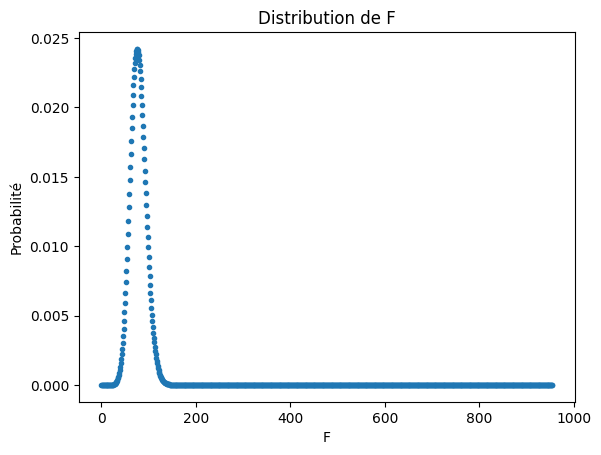

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

conv = np.array([1])
for k_zeta_k in k_zeta:
    conv = np.convolve(k_zeta_k, conv)


print(max(conv))
plt.title('Distribution de F')
plt.ylabel('Probabilité')
plt.xlabel('F')
plt.plot(np.linspace(0,len(conv)-1,len(conv)), conv, '.')

10) Nous allons simplement calculer en partant de k la probabilité d'être inférieur à k jusqu'à ce qu'elle dépasse 0.99.

La valeur du seuil à partir duquel la probabilité de défaillance est inférieure à 0.01 est de 120.


Text(125, 0, 'S = 120')

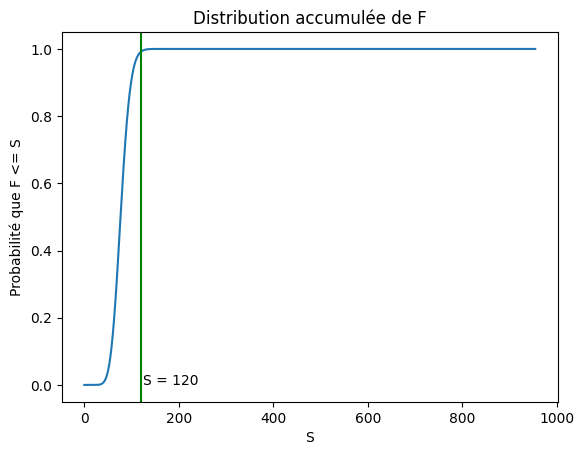

In [ ]:
F_accumulee = np.add.accumulate(conv)
S = 0
f = F_accumulee[0]
while f <= 0.99:
    f = F_accumulee[S]
    S += 1

print("La valeur du seuil à partir duquel la probabilité de défaillance est inférieure à 0.01 est de %d." % S)


plt.title('Distribution accumulée de F')
plt.ylabel('Probabilité que F <= S')
plt.xlabel('S')
plt.plot(np.linspace(0, len(F_accumulee)-1, len(F_accumulee)), F_accumulee)
plt.axvline(S, 0, 1, color='g')
plt.annotate('S = ' + str(S), xy = (S + 5, 0))